# Journal 06 In terms of Stoachastic Block model
\author Calvin Roth

This week I put forth the effort to implement the previous on the stochastic block model and frame the questions remaining in terms of questions in this model. 

## Notation 
n will be total number of nodes in the network

$\{ C_i \}$ will be of communities

P will be the matrix of link probabilities between communities where $P_{ij}$ is link between community i and j

$\{W_i\}$ the size of each community. [W] will be mean a diagonal matrix with $W_i$ in the ith spot. 

$G$ the actual $n \times n$ network generated by this process 

Below is a sample image(not mine of a block stochastic matrix)

![oops](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse3.mm.bing.net%2Fth%3Fid%3DOIP.XibzKaSEmW70_N5gvlHswQHaHa%26pid%3DApi&f=1)]

# Experiment one perfect community information 
In this case assume we know by some means the exact comunity structure to use and the probability of a link from one community to another with perfect clarity. We will compare the profits generated to that of the ideal system when you know every individial node. 

In the code `A_av` is a realization of the block model where instead of having a 1 with chance $P_{ij}$ we set the value in the matrix to $P_{ij}$
We compare this to the uniform price and the true optimal price. 

In [1]:
### Set up
import numpy as np 
from numpy.linalg import norm, inv
from helperfunctions.util import stoch_block, build_constraint, aver_stoch_block
import helperfunctions.util 
import pandas as pd
import networkx as nx
import time
import matplotlib.pyplot as plt
a = 6
c = 4
dim = 4
prob_mat = np.zeros((dim,dim))
np.random.seed(979)
m = 500
sizes = [m] * dim
n = sum(sizes)
ones = np.ones((n,1))
res = [] 
for i in range(dim):
    for j in range(i, dim):
        prob_mat[i,j] = np.random.random()


In [2]:
B =  0.5 * inv(np.eye(n,n) - 2*rho_a*A)
BB =  0.5 * inv(np.eye(n,n) - rho_a*(A+A.T))


NameError: name 'rho_a' is not defined

In [1151]:
a = 5 
c =4 
A = np.zeros((4,4))
A[0,1] = A[0,3] = A[1,2] = A[2,0] = A[3,0] = 1 
rho = 0.9 / norm(A + A.T, ord=2)
print(helperfunctions.util.price_vector(a, c, rho, A))
P = np.zeros((3,4))
P[0,0] = P[0,3] = P[1,1] = P[2,2] = 1 
B =  0.5 * inv(np.eye(4,4) - 2*rho*A)
one = np.ones((4,1))
inv(P @ (B + B.T)@P.T) 
#@ ( a*P@B@one + c*P@B.T@one)

[[4.5       ]
 [3.69311151]
 [5.30688849]
 [4.5       ]]


array([[ 0.20449493, -0.199913  , -0.199913  ],
       [-0.199913  ,  1.20794862, -0.55972944],
       [-0.199913  , -0.55972944,  1.20794862]])

In [222]:
D = A + A.T
C = (2*A)
xs = [1]
data1 = [np.log10( np.sum(D))]
data2 = [np.log10(np.sum(2*A))]
for i in range(20):
    D = D @ (( A + A.T))
    C = C @ (2 * A)
    data1.append(np.log10(np.sum(D)))
    data2.append(np.log10(np.sum(C)))
    xs.append(i+2)
    

In [238]:
for i in range(1, 20):
    print(data2[i] - data2[i-1])
np.log10(2*n*np.mean(prob_mat))
# For data1 try np.log10(1.055 * n*np.mean(prob_mat + prob_mat.T)) why? 

3.288572065664283
3.2837118496418345
3.282923369183564
3.282534704290196
3.28248209340002
3.282465667658876
3.2824647942077974
3.28246458514856
3.2824646959655794
3.282464719667388
3.282464730965131
3.2824647328526453
3.2824647333913504
3.2824647334425023
3.2824647334519597
3.2824647334497072
3.2824647334490464
3.2824647334487125
3.2824647334486627


3.284087297796151

## Roadmap

1. We have methods to bound the eigenvalues 
2. For sparse graphs we should have very similary stuff in Jiali's paper(TODO benchmark) 
3. For denser graphs need to large number limits. Everyone in same block should have centrality like a normal distriubtion, central theorem etc 
    3b. Indepence of links 
4. Use 3 to show centralities in each block are centrality 
5. Lower difference in centralities in different blocks 
6. Upper and lower bound on profits. 
7. are close to optimal profits i.e. using community information gives close to optimal

8. for uniform pricing we want to show there is a regret by look at the centralies helps us figure out $(I - 2G\rho )^{-1}$ and $(I - \rho (G+G^T))^{-1}$ 


In [310]:
m = 500
sizes = [m] * dim
n = sum(sizes)
for i in range(dim):
    for j in range(0, dim):
        prob_mat[i,j] = n**(-1-0.05) * np.random.random()
A = stoch_block(sizes, prob_mat)
A_upper = np.triu(A) - np.diag(np.diag(A))
A_lower = np.tril(A) - np.diag(np.diag(A))
D = A + A.T 
D = D - np.diag(np.diag(D))
A1 = A_upper + A_upper.T 
A2 = A_lower + A_lower.T
np.linalg.norm(D, ord=2), np.linalg.norm(A1, ord=2) , np.linalg.norm(A2, ord=2)

(2.3655445530373167, 2.1119907362530648, 1.9318516525781375)

In [309]:
m

900

In [297]:
t = 0 
for i in range(4):
    for j in range(i+1,4):
        print(i,j)
        C = np.zeros((1000,1000))
        C[0:500, 500:1000] = A1[500*i:500*(i+1), 500*j:500*(j+1)]
        C = C + C.T
        t += norm(C, ord=2)
t

0 1
0 2
0 3
1 2
1 3
2 3


7.446461113496086

In [304]:
2.0000000000000013, 2.0743132930519432

(2.584581170206313, 4.534958583618115)

In [301]:
(4 * 6) * np.sqrt( np.log(500) / np.log(  np.log(500)))

44.264994062452246

In [218]:
print(norm(A1[0:m, m:2*m], ord=2))
C = np.zeros((2*m,2*m))
C[0:m, m:2*m] = A1[0:m, m:2*m]
C = C + C.T 
print(norm(C,ord=2))

11.607664839792193
11.607664839792191


## Experiments

In [1156]:
def powk(A, k):
    i = 1
    res = A
    while(i < k):
        res = res @ A 
        i += 1
    return res

def diagm(A):
    return np.diag(np.diag(A))

In [1157]:
sizes = [500] * 4

In [1158]:
np.random.seed(int(time.time()))
A = stoch_block(sizes, prob_mat)
A_av = aver_stoch_block(sizes, prob_mat)
o = np.ones((A.shape[0], 1))
rho = 0.9 / (norm(A+A.T,ord=2))
#A = A - np.diag(np.diag(A))
#A_av = A_av - np.diag(np.diag(A_av))

In [1159]:
o.T @ (A_av    - np.kron(prob_mat , np.ones((m,m))) ) @ o

array([[0.]])

In [1039]:
k = 3
mat1 = A_av+A_av.T
mat2 = np.kron(prob_mat+prob_mat.T, np.ones((m,m))) - np.kron(diagm(prob_mat*2), np.eye(m,m))

x = o.T @ powk(mat2, k) @ o
y = o.T @ powk(A_av+A_av.T,k) @ o

In [1045]:
o.T @ A_av @ o - ((m**2)*o4.T@prob_mat@o4 - m*o4.T@diagm(prob_mat)@o4)

array([[2.56113708e-09]])

In [1050]:
o.T @ A @ o / ((m**2)*o4.T@prob_mat@o4 - m*o4.T@diagm(prob_mat)@o4)

array([[1.00053736]])

In [1163]:
e1 = np.zeros((2000,1))
e1[0:500] = 1
A_av @ e1

array([[157.7229942],
       [157.7229942],
       [157.7229942],
       ...,
       [  0.       ],
       [  0.       ],
       [  0.       ]])

In [1167]:
e4 = np.zeros((4,1))
e4[0] = 1
e1 - np.kron(e4, np.ones((500,1)))

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [1104]:
rho = 0.9 /norm( A + A.T, ord=2)


In [1105]:
rho_av = 0.9/norm(A_av + A_av.T, ord=2)

In [1106]:
rho_p = 0.9 / norm(prob_mat + prob_mat.T, ord=2)
rho_s = (0.9 * m) / norm(A +A.T,ord=2)

In [1066]:
rho_q = ((2*rho)**2 ) / ( 1 - (2 * rho * norm(prob_mat,ord=2)))

In [941]:
print(o.T @ inv(np.eye(n,n) - rho*(A_av +A_av.T)) @ o)
print(m * o4.T @ inv(np.eye(4,4) - rho_s *(prob_mat+prob_mat.T)) @ o4)

[[36921.06075973]]
[[37111.77973712]]


In [942]:
print(m*o4.T@inv(np.eye(dim,dim) - rho_p *(prob_mat+prob_mat.T))@o4)
print(o.T@inv(np.eye(n,n) - rho*(A_av + A_av.T))@o)

[[37089.42110638]]
[[36921.06075973]]


In [1067]:
print(n + rho_p * m*o4.T @ (prob_mat + prob_mat.T) @o4 + m*(rho_p**2)*10*o4.T @ powk(prob_mat+prob_mat.T,2) @ o4)
print(o.T @ inv(np.eye(n,n) - rho * (A + A.T)) @ o)
print(o.T @ inv(np.eye(n,n) - rho*(A_av +A_av.T)) @ o)
print((m-1) * o4.T @ inv(np.eye(4,4) - rho_s *(prob_mat+prob_mat.T)) @ o4)

[[23580.13750736]]
[[23392.26952088]]
[[23349.22874481]]
[[23315.87270375]]


In [944]:
print(n + rho_p * m*o4.T @ (prob_mat * prob_mat.T) @o4, + m*(rho_p**2)*10*o4.T @ powk(prob_mat+prob_mat.T,2) @ o4)
print(o.T @ inv(np.eye(n,n) - rho * (2*A)) @ o)
print(o.T @ inv(np.eye(n,n) - rho*(A_av*2)) @ o)
print(m * o4.T @ inv(np.eye(4,4) - rho_s *(prob_mat*2)) @ o4)

[[4501.59213964]] [[29858.50534377]]
[[14073.91692656]]
[[14055.39154929]]
[[14086.01369392]]


In [1091]:
k = 3
x = o4.T @ powk(prob_mat+prob_mat.T, k) @ o4  
y = o4.T @ powk(2*prob_mat, 2) @ o4 * ( norm(2*prob_mat,ord=2)**(k-2) )
y1 = o4.T @ powk(2*prob_mat,k) @ o4
x - y

array([[5.43224387]])

In [1176]:
e4 = np.zeros((4,1))
e4[3] = 4
e = np.zeros((2000,1))
e[1500:2000] = 1
prob_mat @ e4

array([[1.07698392],
       [3.73540913],
       [2.47285695],
       [2.34151089]])

In [1177]:
A_av @ e, m * prob_mat @ e4

(array([[134.62299  ],
        [134.62299  ],
        [134.62299  ],
        ...,
        [292.6888608],
        [292.6888608],
        [292.6888608]]),
 array([[ 538.49196001],
        [1867.70456578],
        [1236.42847731],
        [1170.75544319]]))

In [1134]:
k = 20
(o.T @ powk(A,k) @ o) / ( o.T@powk(A_av,k)@o)

array([[1.00222898]])

In [1111]:
op = np.ones((prob_mat.shape[0], 1))
m * op.T @ (inv(np.eye(dim,dim) - rho_p*(prob_mat+prob_mat.T)) - inv(np.eye(dim,dim) - 2*rho_p*prob_mat)) @  op

array([[22908.55522783]])

In [971]:
print(o.T @ ( powk(np.kron(diagm(prob_mat+prob_mat.T), np.eye(m,m)), 3)) @ o)
o4.T @ powk(2 * diagm(prob_mat),3) @ o4 * m

[[8231.44501951]]


array([[8231.44501951]])

In [882]:
total = 0 
for k in range(2,10):
    x = m*o4.T@powk(rho_p*(prob_mat+prob_mat.T),k) @ o4 -  (m*(rho_p**k)*(2**k)*(norm(prob_mat,ord=2)**(k-2)))*o4.T @ powk(prob_mat,2)@o4
    print(x)
    total += x

[[276.9974207]]
[[125.8504621]]
[[-7.68317196]]
[[-126.96982671]]
[[-233.89464969]]
[[-329.85525526]]
[[-416.01115099]]
[[-493.36898531]]


In [881]:
total

array([[-1204.93515712]])

In [541]:
print((o.T @ inv(np.eye(2000,2000) - 2*rho_av*A_av) @o) / ( o.T @ inv(np.eye(2000,2000) - rho_av * (A_av + A_av.T) ) @ o))
(o4.T @ inv(np.eye(4,4) - 2*rho_p*prob_mat) @o4) / ( o4.T @ inv(np.eye(4,4) - rho_p * (prob_mat + prob_mat.T) ) @ o4)


[[0.94849411]]


array([[0.94847489]])

In [542]:
print((o.T @ inv(np.eye(2000,2000) - 2*rho*A) @o) / ( o.T @ inv(np.eye(2000,2000) - rho * (A + A.T) ) @ o))


[[0.9466795]]


In [475]:
sums = np.sum(prob_mat + prob_mat.T, axis=1)
amin = np.min(sums)
amax = np.max(sums)
1000*amin, 1000*amax

(2644.4104308345163, 4291.125839900934)

In [410]:
o5 = np.ones((2000,1)) 
x = o5.T @ G @ o5
t = 0
o4 = np.ones((4,1)) 
s =  ( 2 * prob_mat@prob_mat - prob_mat@prob_mat.T - prob_mat.T @ prob_mat)
(o5.T @ ( G) @  o5) / ((500**3) * (1/(m*m)) * o4.T @s @ o4)

array([[11.3336661]])

In [351]:
o = np.ones((2000,1))
o.T @ ( A  @ A  ) @ o , m * m * m * m * np.ones((1,4)) @ (prob_mat @prob_mat @prob_mat) @ np.ones((4,1))


(array([[1.86922304e+09]]), array([[1.79492647e+12]]))

In [98]:
a = 6
c= 4 
rho_a = 0.9/ norm(A+A.T, ord=2)
prof = helperfunctions.util.optProfit(A, rho_a, a,c)
price = helperfunctions.util.price_vector(a,c,rho_a, A)
prof_uni = helperfunctions.util.computeProfit(A, 0.5*(a+c)*np.ones((n,1)), rho_a, a, c)
B =  0.5 * inv(np.eye(n,n) - 2*rho_a*A)
P = np.zeros((n,4))
P[0:m, 0] = 1
P[m:2*m, 1] = 1
P[2*m:3*m , 2] = 1
P[3*m: , 3] = 1
B_av = 0.5 * inv(np.eye(n,n) - 2*rho_a*A_av)
#B_av = 0.5*inv(np.eye(4,4) - 2*rho_a*prob_mat*n*n)
cores = [sizes[0]]
for i in range(1,len(sizes)):
    cores.append(sizes[i] + cores[i-1])

conA, conB = build_constraint(cores, B, a, c)
conA_av, conB_av = build_constraint(cores, B_av, a,c)

to_full = np.zeros((n,dim))
to_full[0:sizes[0], 0] = 1
for i in range(1,dim):
    to_full[cores[i-1]:cores[i], i] =1 

price_block = to_full @ inv(conA) @ conB
price_av = to_full @ inv(conA_av) @ conB_av
prof_block = helperfunctions.util.computeProfit(A, price_block, rho_a, a,c)
prof_av = helperfunctions.util.computeProfit(A, price_av, rho_a, a,c)

data = np.zeros((2,3))
data[0,0] = prof
data[0,1] = prof_av
data[0,2] = prof_block
data[1,0] = (1 - (prof / prof)) * 100
data[1,1] = (1 - (prof_av / prof)) * 100
data[1,2] = (1 - (prof_uni / prof)) * 100
pd.DataFrame(data, columns=["Full information", "Block Information", "Uniform Price"], index=["Raw profit", "Regret %"])


,Full information,Block Information,Uniform Price
Raw profit,8214.005769,8196.227716,8196.242520
Regret %,0.000000,0.216436,60.092798


In [93]:
Q = np.ones((2000,1))
I = np.eye(2000,2000)
price_block = P @ inv( P.T @ (B + B.T) @ P) @ (a*P.T @ B @ones + c*P.T@B.T@ones)
p1 = helperfunctions.util.computeProfit(A, price_block, rho_a, a, c)
prof - p1, price.T @ B @ price - price_block.T @ B @ price_block
price_block

array([[9.21371591],
       [9.21371591],
       [9.21371591],
       ...,
       [0.57169777],
       [0.57169777],
       [0.57169777]])

In [94]:
s1 = 0 
s2 = 0
n = 30
for i in range(n):
    if(i % 10 == 0): 
        print(i)
    np.random.seed(int(time.time()))
    A = stoch_block(sizes, prob_mat)
    rho = 0.9 /  norm(A+A.T, ord=2)
    s1 += (1/n) * (ones.T @ A@A@A@A@ones ) * (rho**4)
    s2 += (1/n) * (ones.T @ A @ A  @ ones) * (rho**2)

0
10
20


In [135]:
np.linalg.eig( prob_mat - (prob_mat @ prob_mat))

(array([-2.08292496+0.j        , -0.89319781+0.j        ,
         0.35178017+0.11477142j,  0.35178017-0.11477142j]),
 array([[-0.3259274 +0.j        ,  0.15767582+0.j        ,
          0.55003481+0.j        ,  0.55003481-0.j        ],
        [-0.6836842 +0.j        , -0.52559319+0.j        ,
         -0.00671   +0.38144522j, -0.00671   -0.38144522j],
        [-0.37547532+0.j        , -0.26131496+0.j        ,
         -0.14145425-0.50784753j, -0.14145425+0.50784753j],
        [-0.53419616+0.j        ,  0.79410618+0.j        ,
         -0.52196805-0.03933392j, -0.52196805+0.03933392j]]))

In [140]:
s2, (m**3 - m) * np.ones((1,4)) @ prob_mat @ prob_mat @ np.ones((4,1)) + m * np.ones((1,4)) @ prob_mat @ np.ones((4,1))
one4 = np.ones((4,1))
s1 / ((m**2) * one4.T @ prob_mat @ one4 + 2*(m*(m-1))* one4.T @ prob_mat @ one4 +    (m**4 - 7*m*(m-1) ) * one4.T @ poww(prob_mat,3) @one4 )
A_av = aver_stoch_block(sizes, prob_mat)
ones.T @ A_av @ A_av @ ones, (m**3) * one4.T @ prob_mat @ prob_mat @ one4
s1, s2

(array([[37.92311484]]), array([[193.19013163]]))

#### def poww(A,k):
    n = len(A)
    res = np.eye(n,n)
    for i in range(k):
        res = res @ A 
    return res

In [5]:
ones.T @ B_av @ ones,  (m/2)*np.ones((1,4)) @ inv(np.eye(4,4) - 2*rho_a*m*prob_mat) @ np.ones((4,1)), ones.T @ B @ ones
np.linalg.norm((a+c)*0.5*ones + 0.5*(a-c)*inv(B + B.T)@(B-B.T)@ones- price), np.linalg.norm( price - inv(B+B.T)@(a*B@ones + c*B.T@ones))

(6.55298736269999e-14, 7.875072912709632e-13)

In [6]:
x = (m/2) * inv(np.eye(4,4) - 2*rho_a*m*prob_mat)
x2 = (m/2) *  inv(np.eye(4,4) - 2*rho_a*m*prob_mat.T) 
((a+c)/2) * np.ones((4,1)) + ((a-c)/2) * inv(x + x2)@ ( x - x2) @ np.ones((4,1))
B_av = 0.5 * inv(np.eye(n,n) - 2*rho_a*A_av)
price_av = inv(B_av + B_av.T) @ (a*B_av@ones+  c*B_av.T@ones)
price = inv(B + B.T) @ (a*B@ ones +  c*B.T@ones)
price2 = helperfunctions.util.price_vector(a, c, rho_a, A)

In [9]:
ones.T @ B_av @ ones, 0.5* m*  np.ones((1,4)) @ inv(np.eye(4,4) - 2* rho_a * m * prob_mat) @ np.ones((4,1))

(array([[3857.14394239]]), array([[3857.14394239]]))

In [1478]:
A = nx.generators.erdos_renyi_graph(4000, 1/1000, directed=True)
A = nx.adjacency_matrix(A)
A = A.todense()
rho_a = 0.95 / np.linalg.norm(A + A.T, ord=2)
B = 0.5 * inv(np.eye(4000, 4000) - 2*rho*A)
ones = np.ones((4000,1))
p2 = 0.5*(a+c)*ones + 0.5*(a-c)* inv(B + B.T) @ (B - B.T) @ ones
p3 = inv(B + B.T) @ (a*B@ones + c*B.T @ones)
np.linalg.norm(p2 - p3)

4.0923055622971785e-13

In [1324]:

inv(conA_av) @ conB_av, (inv(P.T@(B + B.T) @ P) @ (a*P.T @ B@ones  + c*P.T @ B.T @ ones))  [0], (inv(B_av + B_av.T) @ (a*  B_av@ones  + c* B_av.T @ ones))[0]

(array([[5.51145054],
        [6.34554587],
        [4.66749307],
        [3.21600564]]),
 array([5.50579656]),
 array([5.51145054]))

In [1315]:
price - (inv(B + B.T) @ (a*  B@ones  + c* B.T @ ones))

array([[ 0.00000000e+00],
       [ 4.61852778e-14],
       [-3.37507799e-14],
       ...,
       [ 8.88178420e-16],
       [ 0.00000000e+00],
       [-1.24344979e-14]])

In [1258]:
notes = {0.4 : 0.002238, 0.6 : 0.007529, 0.9 : 0.070372} # at n = 6400 

In [1259]:
P = np.zeros((dim, 2))
P[0, 0 ] =1
P[1:, 1] = 1
part_block = P @ inv(P.T @ conA @ P) @ P.T @ conB
v_b = to_full @ part_block
b = to_full @ conB
prof_block = helperfunctions.util.computeProfit(A, v_b, rho_a, a, c)
prof - prof_block, price.T @ B @ price - v_b.T @ B @ v_b

(3906.132548941304, array([[3906.13254894]]))

In [1173]:
to_full.shape

(2400, 4)

In [1071]:
price_uni = 0.5*(a+c) * np.ones((n,1))
ones = np.ones((n,1))
v_b.T @ B @ v_b, prof_block + a*c*ones.T @ B @ ones

(array([[204492.50753637]]), array([[204492.50753637]]))

One note is that while the block information always performs well the uniform price in this particular can vary wildly in effectiveness. Sometimes it is as low as 9-10% regret but other times it performs horribly. 

The block information system works very well and there is typically no effective loss compared to knowing the real system.  As a corollary in the language of my previous work of parititions this implies that any finer splitting is not benefencial because the optimal gain is so limited.  We not that in partitions this structure should be regarded as a partition of medium resolution, there are more coarse partiitions and more fine resolutions. 


![Alt text](http://sheaves.github.io/images/partitions.png) 
## Todo ## Graph this against differing parameters 


# Underspliting 
The first way my works applies is when the data is split, i.e. there are communities that should have been split because they are distinct but we didn't probably from lack of information. This will be the next experiment where we fuse the first two communities and the later two . 

In [960]:
P = np.zeros((dim, 2))
P[0:2, 0 ] =1
P[2:, 1] = 1
price_part = to_full @ P @  inv(P.T @ conA @ P) @ P.T @ conB
prof_part = helperfunctions.util.computeProfit(A,price_part, rho_a, a,c)
data_part = np.zeros((2,4))
data_part[:, 0:3] = data
data_part[0, 3] = prof_part
data_part[1,3] = (1 - (prof_part / prof)) * 100
pd.DataFrame(data_part, columns=["Full information", "Block Information", "Uniform Price", "Partial"], index=["Raw profit", "Regret %"])

,Full information,Block Information,Uniform Price,Partial
Raw profit,11431.486206,11419.868001,8116.964187,11064.009248
Regret %,0.000000,0.101633,28.994673,3.206597


Understanding the cost of this effect seems what my work work is best set up to handle math wise. The performance of the partial information is bounded between the block information and the partial information profits but otherwise can vary a lot between them. 

In [901]:
price.T @ B @ price - price_part.T @ B @ price_part

array([[1840.33043674]])

# Other questions
## Subposet between best blocks and uniform 



In [835]:
parts = list(helperfunctions.util.partition([0,1,2,3]))
data = np.zeros((len(parts),4))
names = []
k = 0 
best_part = [[0],[1],[2],[3]]
def is_subset(small, big):
    for i in small:
        found = False
        for j in big:
            if i in j:
                found = True 
                break
        if(not found):
            return False
    return True

for blocks in parts:
    P = np.zeros((len(blocks), 4))
    block_map = [0 for i in range(len(A))]
    for i in range(len(blocks)):
        for j in blocks[i]:
            P[i, j] = 1
            block_map[j] = i 

    conA, conB = build_constraint(cores,B,a, c)
    guess_A = P @ conA @ P.T
    guess_B = P @ conB
    price_guess = to_full @ P.T @ inv(guess_A) @ guess_B
    prof_guess = helperfunctions.util.computeProfit(A, price_guess, rho_a, a,c)
    data[k,0] = k
    data[k,1] = prof_guess 
    data[k,2] = 100*(1 - (prof_guess / prof))
    data[k,3] = len(blocks)
    names.append(str(blocks))
    k += 1
 

    

In [836]:
table = pd.DataFrame(data, columns=["Index", "Profit", "%Regret", "length"])
table.insert(0 , "Names", names)
table.sort_values(by=["%Regret"])
# G = nx.DiGraph()
# i = 0
# def isSubset(child, parent):
#     for block in child:
#         if(len(block) == 1):
#             continue
#         index = None
#         for pblock in parent:
#             if(block[0] in pblock):
#                 index = pblock 
#         for ele in block:
#             if(ele not in index):
#                 return False 
#     return True
            
# for block in parts:
#     G.add_node(str(block))
# for b in parts:
#     for c in parts:
#         if(str(b) == str(c)): continue
#         if(isSubset(b, c)): G.add_edge(str(b), str(c))

        

# G[str(parts[2])]

,Names,Index,Profit,%Regret,length
14,"[[0], [1], [2], [3]]",14.0,8198.466740,0.215043,4.0
4,"[[0], [1], [2, 3]]",4.0,7822.519632,4.790761,3.0
11,"[[0, 1], [2], [3]]",11.0,6585.211056,19.850257,3.0
2,"[[0, 1], [2, 3]]",2.0,6390.058839,22.225489,2.0
7,"[[0], [1, 2], [3]]",7.0,5796.365015,29.451439,3.0
10,"[[0], [2], [1, 3]]",10.0,5254.939039,36.041228,3.0
1,"[[0], [1, 2, 3]]",1.0,4959.124453,39.641639,2.0
12,"[[1], [0, 2], [3]]",12.0,3837.445900,53.293782,3.0
5,"[[0, 1, 2], [3]]",5.0,3835.721488,53.314770,2.0
13,"[[1], [2], [0, 3]]",13.0,3807.122647,53.662852,3.0




# Chaper

## Modularity

In [837]:
G = nx.DiGraph(A)

In [838]:
communities_four = nx.algorithms.community.greedy_modularity_communities(G, n_communities=4)


In [881]:
communities_four = [list(i) for i in communities_four]
len(communities_four[0]),len(communities_four[1]),len(communities_four[2]),len(communities_four[3])

(1000, 500, 499, 1)

In [840]:
def slice(communty,  n):
    v = np.zeros((n,1))
    for i in communty:
        v[i,0] = 1
    return v
    
def build_price(comms, B, a, c):
    n = len(comms)
    m = len(B)
    G = np.zeros((n,n))
    v = np.zeros((n,1))
    ones = np.ones((m, 1))
    
    for i in range(n):
        v1 = slice(comms[i],m)
        for j in range(n):
            v2 = slice(comms[j],m)
            G[i,j] = v1.T @ B @ v2 + v2.T @ B @ v1
        v[i] = a * v1.T @ B @ ones + c * ones.T @ B @ v1
    price_set = inv(G) @ v 
    price = np.zeros((m,1))
    for i in range(n):
        for c in comms[i]:
            price[c, 0] = price_set[i]
    return price

In [841]:
price_computed = build_price(communities_four,B, a, c)

In [880]:
helperfunctions.util.computeProfit(A,price_computed, rho_a, a, c), prof, prof_uni

(3807.124060513828, 8216.134997306053, 3281.219536151347)

This is performing badly unsure why. 

## Convergence

In [843]:
A_power = np.eye(2000,2000)
A_term_0 = np.eye(2000,2000)
A_term_1 = np.eye(2000,2000)
diffs = []
diffs2 = []
conA_approx = np.eye(2000,2000)
for i in range(1,100):
    diffs.append( np.log10(np.linalg.norm(B - 0.5*A_power)))
    approx = to_full.T @ (conA_approx + conA_approx.T) @ to_full
    diffs2.append(np.log10(np.linalg.norm(conA - approx)))
    A_term_0 = A @ A_term_0
    A_power += ((2*rho_a) ** i) * (A_term_0)
    conA_approx = 0.5*A_power


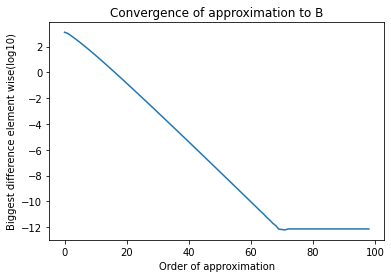

In [844]:
plt.xlabel("Order of approximation")
plt.ylabel("Biggest difference element wise(log10)")
plt.title("Convergence of approximation to B")

plt.plot(diffs2)

## Spectral clustering 
Since modularity didn't work well let's try clustering. And why not spectrally. We start with clustering on the adjacency graph itselt(+ A.T). This has medicore results only barely better than modularity based methods

In [847]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(4, affinity='precomputed', n_init=100,
                        assign_labels='discretize')
answer = sc.fit_predict(A + A.T)

In [848]:
sc = SpectralClustering(4, affinity='precomputed', n_init=100,
                        assign_labels='discretize')

In [849]:
answer = sc.fit_predict(A + A.T)

In [850]:
splt = {i : [] for i in range(len(set(answer)))}
        #2 : [], 3 : []}
for i in range(len(answer)):
    splt[answer[i]].append(i) 

In [851]:
for i in range(len(set(answer))):
    print(len(splt[i]))

262
500
268
970


In [852]:
p = build_price(splt, B, a,c)

In [853]:
helperfunctions.util.computeProfit(A, p, rho_a, a, c), prof_part

(3812.8690144090906, 6390.011500294559)

### Cosine
Next we do it based on cosine similarity between each row. This works very well. In fact it seems to just recover the paritition 

In [862]:
import  sklearn.metrics as metrics

In [882]:
sc = SpectralClustering(4, affinity='precomputed', n_init=100,
                        assign_labels='discretize')
cosine = metrics.pairwise.cosine_similarity(A )

In [883]:
answer = sc.fit_predict(cosine)

In [884]:
splt = {i : [] for i in range(len(set(answer)))}
        #2 : [], 3 : []}
for i in range(len(answer)):
    splt[answer[i]].append(i) 

In [1038]:
cosine = metrics.pairwise.cosine_similarity(A )
answer = sc.fit_predict(cosine)
splt = {i : [] for i in range(len(set(answer)))}
    #2 : [], 3 : []}
for i in range(len(answer)):
    splt[answer[i]].append(i) 
price_spec = build_price(splt, B, a,c)
helperfunctions.util.computeProfit(A, price_spec, rho_a, a, c), prof

(11081.828435490956, 11092.119325635815)

In [885]:
p = build_price(splt, B, a,c)
helperfunctions.util.computeProfit(A, p, rho_a, a, c), prof

(8198.466739875597, 8216.134997306053)

# Trials



In [ ]:
a = 6
c = 4
dim = 4
prob_mat = np.zeros((dim,dim))
np.random.seed(10)


In [1406]:

for m in range(100, 1500, 50):
    sizes = [m ] * dim
    n = sum(sizes)
    ones = np.ones((n,1))
    res = [] 
    for i in range(dim):
        for j in range(i,dim):
            prob_mat[i,j] = np.random.random()
    np.random.seed(int(time.time()))
    A = stoch_block(sizes, prob_mat)
    A_av = aver_stoch_block(sizes, prob_mat)
    rho_a = 0.9/ norm(A+A.T, ord=2)
    prof = helperfunctions.util.optProfit(A, rho_a, a,c)
    price = helperfunctions.util.price_vector(a,c,rho_a, A)
    prof_uni = helperfunctions.util.computeProfit(A, 0.5*(a+c)*np.ones((n,1)), rho_a, a, c)
    B =  0.5 * inv(np.eye(n,n) - 2*rho_a*A)
    P = np.zeros((n,4))
    P[0:m, 0] = 1
    P[m:2*m, 1] = 1
    P[2*m:3*m , 2] = 1
    P[3*m: , 3] = 1
    B_av = 0.5 * inv(np.eye(n,n) - 2*rho_a*A_av)
    cores = [sizes[0]]
    for i in range(1,len(sizes)):
        cores.append(sizes[i] + cores[i-1])

    conA, conB = build_constraint(cores, B, a, c)
    conA_av, conB_av = build_constraint(cores, B_av, a,c)

    to_full = np.zeros((n,dim))
    to_full[0:sizes[0], 0] = 1
    for i in range(1,dim):
        to_full[cores[i-1]:cores[i], i] =1 

    price_block = to_full @ inv(conA) @ conB
    price_av = to_full @ inv(conA_av) @ conB_av
    prof_block = helperfunctions.util.computeProfit(A, price_block, rho_a, a,c)
    prof_av = helperfunctions.util.computeProfit(A, price_av, rho_a, a,c)

    data = np.zeros((2,3))
    data[0,0] = prof
    data[0,1] = prof_av
    data[0,2] = prof_block
    data[1,0] = (1 - (prof / prof)) * 100
    data[1,1] = (1 - (prof_av / prof)) * 100
    data[1,2] = (1 - (prof_block / prof)) * 100
    print(m, (1-(prof_av/prof))*100, (1-(prof_block/prof))*100, np.log10( abs(( (prof_av / prof)  - (prof_block / prof)))) )


100 0.9055508909751819 0.8002242558395767 -2.977461789976018
150 1.408436235394539 1.3733608816240528 -3.4549979399775723
200 0.2161275196629897 0.2135941272268238 -4.596297530438356
250 0.22085736478320017 0.21521376735749165 -4.248443973306947
300 0.35146071646484645 0.3373120817556141 -3.8492854659244147
350 0.2061323277727567 0.20561417413256233 -5.285541446441743
400 0.3831105615559216 0.37680403683747477 -4.200209897710289
450 0.18939111983384826 0.18895929822714264 -5.364695631019247
500 0.15078927371363626 0.15052326150410966 -5.575098429502998
550 0.1128703201930703 0.11186126902036353 -4.996086808529555
600 0.1170001960350664 0.11514113947915794 -4.730707397992841
650 0.12495096022908658 0.12399448812049352 -5.019327689788003
700 0.09247998812776936 0.0914793145287307 -4.99970755813772
750 0.16513552672233756 0.16485106907060398 -5.5459823794881515
800 0.08480623594799841 0.0841688245662442 -5.195580185937721
850 0.08040225215163455 0.08007855928691132 -5.489866873799418
900 

In [1453]:
A.shape

(2000, 2000)

In [202]:
ms = [100, 200, 300, 400, 500]
for m in ms:
    np.random.seed(int(time.time()))
    sizes = [m]*4
    s = m**( - ( 1 + 0.01))
    A = stoch_block(sizes, prob_mat)
    A_av = aver_stoch_block(sizes, s * prob_mat)
    print(np.linalg.norm(A_av + A_av.T, ord=2), np.linalg.norm( prob_mat + prob_mat.T, ord=2) * m * s )

2.6580144494133187 2.6580144494133204
2.6396542024755703 2.6396542024755734
2.6289729946287177 2.6289729946287204
2.621420779027317 2.621420779027326
2.6155777691804705 2.615577769180464


In [181]:
np.linalg.norm(A)
sizes

[500, 500, 500, 500]

In [157]:
print(np.linalg.norm(A[0:250, 0:250]))
print(np.linalg.norm(A[250:500, 250:500]))
print(np.linalg.norm(A[500:750, 500:750]))
print(np.linalg.norm(A[750:, 750:]))

179.88051589874874
179.53551180755298
179.49373248110922
897.9326255349006


In [158]:
A_av.shape

(2000, 2000)

In [170]:
prob_mat

array([[0.51639863, 0.57066759, 0.02847423, 0.17152166],
       [0.        , 0.68527698, 0.83389686, 0.30696622],
       [0.        , 0.        , 0.89361308, 0.72154386],
       [0.        , 0.        , 0.        , 0.18993895]])

In [171]:
M = np.ones((500, 500))


In [182]:
X = np.kron(prob_mat, M) 

In [183]:
X - A_av

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [176]:
X[0, 1995:]

array([0.17152166, 0.17152166, 0.17152166, 0.17152166, 0.17152166])

In [199]:
np.linalg.norm(A_av + A_av.T, ord=2)

139.16414055562385

In [200]:
np.linalg.norm( prob_mat + prob_mat.T, ord=2) * 500  * 0.1

139.16414055562407